In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
np.random.seed(45)

In [82]:
def noise(mu, sigma, K):
    return np.random.normal(mu, sigma, K)

In [83]:
def normal_pdf(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma * sigma)) * np.exp(-0.5 * (x - mu) * (x - mu) / (sigma * sigma))

In [84]:
def Ex_1(a,b,c):
    val = a*5**3/3 + b*5**2/2 + c*5
    val /= 5
    return val

In [85]:
def Ex_2(a,b,c):
    val = a*a*5**4 + b*b*5**3/3 + c*c*5 + 2*a*b*5**4 /4 + 2*b*c*5*5 /2 + 2*a*c*5**3 / 3
    val /= 5
    return val

In [86]:
def f_0(r, X_):
    C = np.ones(len(X_))
    return r * C

def f_1(q, r, X_):
    return q*X_ + r

In [87]:
def fx(X):
    return np.sin(X*np.pi)

In [88]:
X = np.random.uniform(-1, 1, 2)
mean = 0
sigma = 1
# X = np.array([1, 2, 3])
Y = fx(X) 
print("X : ", X)
print("Y : ", Y)

X :  [0.97802303 0.09908945]
Y :  [0.06898786 0.30629517]


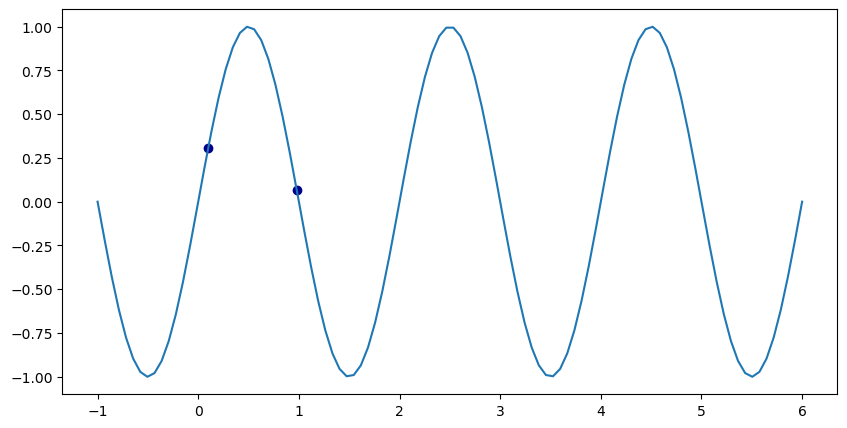

In [89]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
y = fx(x)
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [90]:
N = 100

In [101]:
def fit_f0(X_, Y_):
    # return np.sum(Y_) / 3
    return np.polyfit(X_, Y_, 0)[0]

def g_bar_0():
    c_avg = 0

    for _ in range(N):
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = fx(X_i) + n_

        c_i = fit_f0(X_i, Y_i)
        prob_n_ = 1

        for i in n_:
            prob_n_ *= normal_pdf(i, mean, sigma)

        c_avg += prob_n_ * c_i
    
    return c_avg

0.36471804140845465


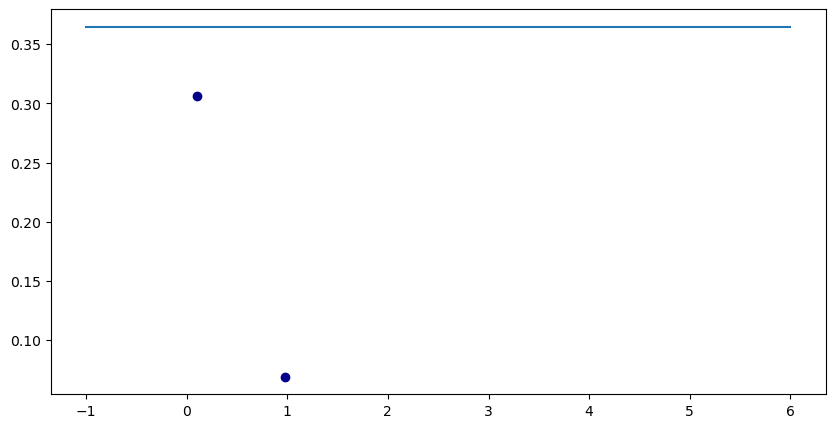

In [102]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g0_c_ = g_bar_0()

print(g0_c_)

y = f_0(g0_c_, x)
 
fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [103]:
def Ed_Eout_0():
    c_avg = 0
    gbar = g_bar_0()
    for _ in range(N):
        #generating dataset
        X_i = np.random.uniform(0, 5, 3)
        Y_i = fx(X_i)

        #fitting dataset
        gd = fit_f0(X_i, Y_i)  
        c_avg += (gd - gbar)
        
    c_avg  = c_avg / N

    var_gd = Ex_2(0,0,c_avg)

    bias_gd = c_avg**2

    # print(var_gd,bias_gd,var_e)
    return var_gd + bias_gd 

In [104]:
Ed_Eout_0()

0.03539553905397929

In [105]:
def fit_f1(X_, Y_):
    # too mathematical just use the library

    return np.polyfit(X_, Y_, 1)

def g_bar_1():
    b_avg, c_avg = 0, 0

    for _ in range(N):
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = fx(X_i) + n_

        b_i, c_i = fit_f1(X_i, Y_i)
        prob_n_ = 1

        for i in n_:
            prob_n_ *= normal_pdf(i, mean, sigma)

        b_avg += prob_n_ * b_i
        c_avg += prob_n_ * c_i
    
    return b_avg, c_avg

0.4319593195089388 -0.7306349271477773


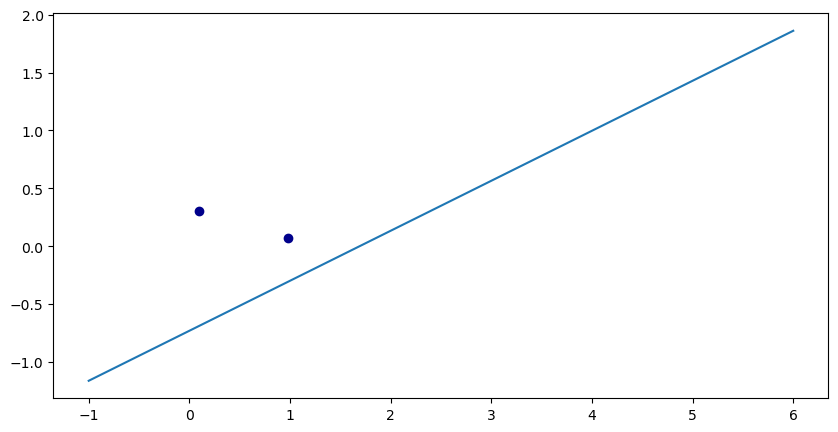

In [106]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g1_b_, g1_c_ = g_bar_1()

print(g1_b_, g1_c_)

y = f_1(g1_b_, g1_c_, x)
 
fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [107]:
def Ed_Eout_1():
    c_avg = 0
    b_avg = 0
    gbar_b,gbar_c = g_bar_1()
    for _ in range(N):
        #generating dataset
        X_i = np.random.uniform(0, 5, 3)
        Y_i = fx(X_i)

        #fitting dataset
        gd_b,gd_c = fit_f1(X_i,Y_i)
        b_avg += gd_b - gbar_b
        c_avg += gd_c - gbar_c
        
    c_avg  = c_avg / N
    b_avg = b_avg / N

    var_gd = Ex_2(0,b_avg,c_avg)

    bias_gd = 0

    # print(var_gd,bias_gd,var_e)
    return var_gd + bias_gd

In [108]:
err0 = Ed_Eout_0()
err1 = Ed_Eout_1()


print("Error for H0: ", err0)
print("Error for H1: ", err1)

Error for H0:  0.02078520360325462
Error for H1:  3.6981612588408703
